In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [11]:
dados_df = pd.read_csv('base_alunos.csv')

In [12]:
dados_df.describe()


,nota_final,horas_estudo_semana,frequencia_percentual,nota_prova_1,nota_prova_2,sono_medio,atividade_fisica
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,99.897975,12.092725,84.306525,66.945700,68.528125,6.566400,0.610000
std,0.873860,3.833165,9.450222,14.846186,12.124344,0.968352,0.488361
min,87.440000,0.000000,58.030000,21.560000,32.940000,3.560000,0.000000
25%,100.000000,9.380000,77.502500,57.040000,60.102500,5.947500,0.000000
50%,100.000000,12.235000,84.660000,67.380000,68.360000,6.530000,1.000000
75%,100.000000,14.525000,91.222500,76.920000,76.185000,7.215000,1.000000
max,100.000000,27.410000,100.000000,100.000000,99.220000,9.690000,1.000000


In [13]:
dados_df.head()

,nota_final,horas_estudo_semana,frequencia_percentual,nota_prova_1,nota_prova_2,sono_medio,atividade_fisica
0,100.0,13.99,69.06,79.07,69.50,6.32,1
1,100.0,11.45,79.01,57.26,62.85,7.87,1
2,100.0,14.59,85.05,66.44,69.47,5.85,1
3,100.0,18.09,85.47,58.07,74.52,5.70,1
4,100.0,11.06,80.50,58.48,68.59,6.02,0


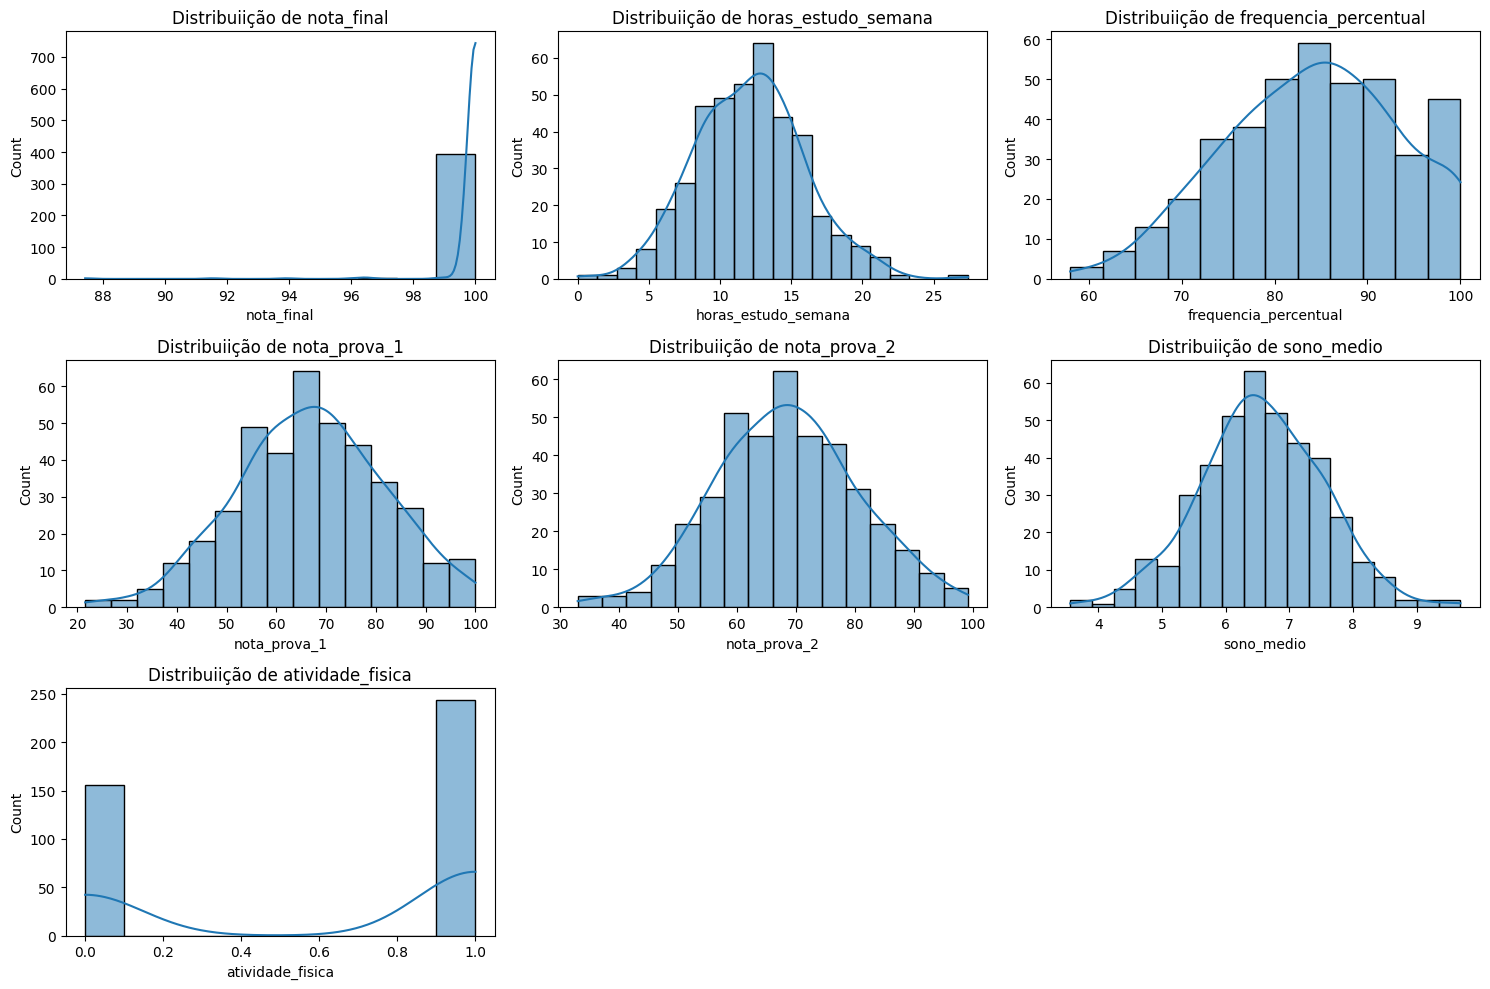

In [16]:
# GERANDO O GRÁFICO DE DISTRIBUIÇÃO DE CADA COLUNA
plt.figure(figsize=(15, 10))

for i , coluna in enumerate(dados_df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(dados_df[coluna], kde=True)
    plt.title(f'Distribuiição de {coluna}')
plt.tight_layout()
plt.show()    

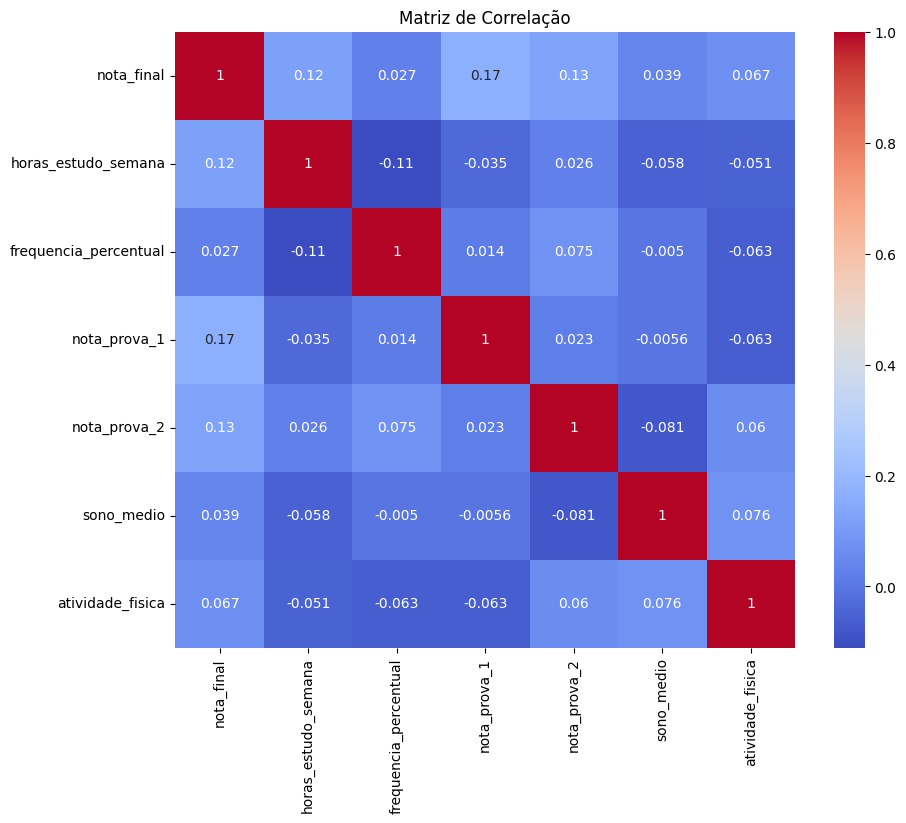

In [19]:
# GRAFICOS DE CORRELAÇÃO

plt.figure(figsize=(10, 8))
corr_matrix = dados_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [21]:
# DEFININDO OS X E Y

x = dados_df[['horas_estudo_semana', 'frequencia_percentual', 'nota_prova_1', 'nota_prova_2', 'sono_medio', 'atividade_fisica']]
y = dados_df['nota_final']


# DIVIDINDO OS DADOS EM TREINO E TESTE
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42) # 80% treino e 20% teste

In [ ]:
# TREINANDO O MODELO

x_stats = sm.add_constant(x_treino)
modelo_stats = sm.OLS(y_treino, x_stats).fit()
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.981
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           0.000776
Time:                        12:44:42   Log-Likelihood:                -352.13
No. Observations:                 280   AIC:                             718.3
Df Residuals:                     273   BIC:                             743.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    96.97

In [ ]:
# Treinando Linear Regression

mod_lr = LinearRegression().fit(x_treino, y_treino)
y_pred = mod_lr.predict(x_teste)

print('Resumo do Modelo (Statsmodels):')
print(modelo_stats.summary())
print('R2:', r2_score(y_teste, y_pred))



Resumo do Modelo (Statsmodels):
                            OLS Regression Results                            
Dep. Variable:             nota_final   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     3.981
Date:                Tue, 25 Mar 2025   Prob (F-statistic):           0.000776
Time:                        15:36:10   Log-Likelihood:                -352.13
No. Observations:                 280   AIC:                             718.3
Df Residuals:                     273   BIC:                             743.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

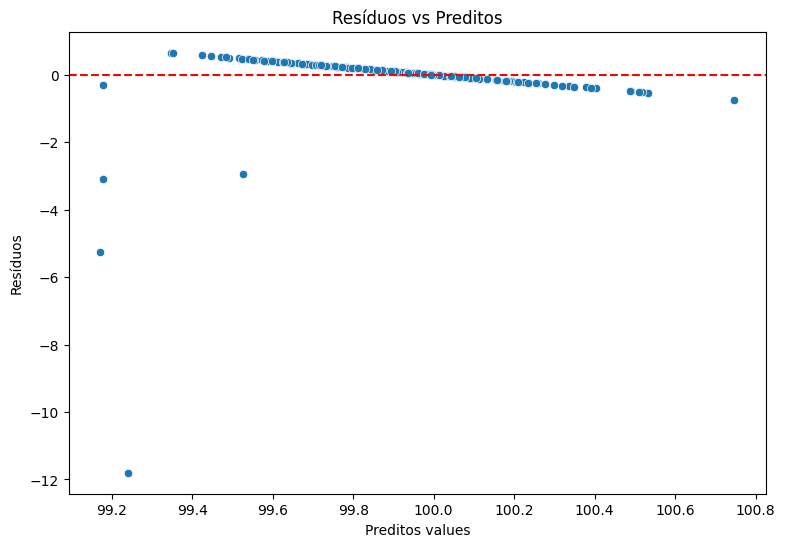

In [ ]:
# Linearidade

residuais = modelo_stats.resid
preditos = modelo_stats.fittedvalues

# Plotando os dados
plt.figure(figsize=(9, 6))
sns.scatterplot(x=preditos, y=residuais)
plt.axhline(y=0, color='red', linestyle='--')

plt.title('Resíduos vs Preditos')
plt.xlabel('Preditos values')
plt.ylabel('Resíduos')
plt.show()

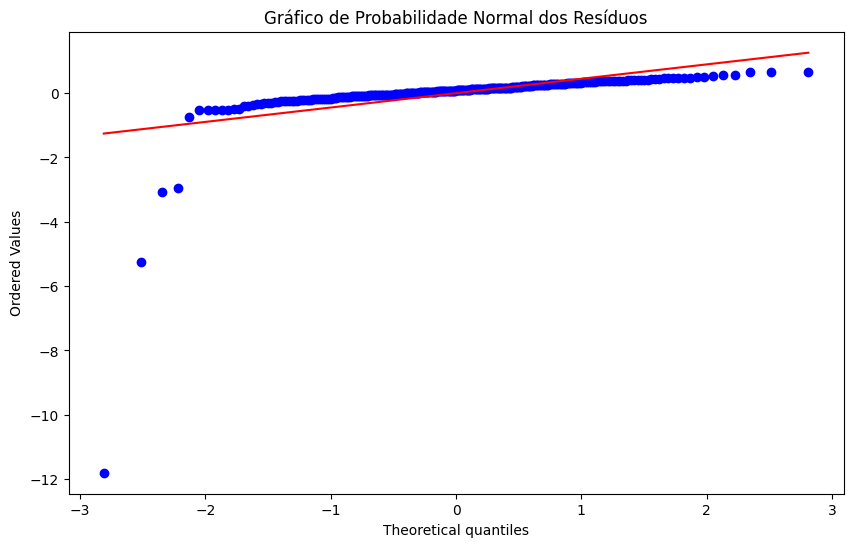

In [28]:
# NORMALIDADE DOS RESÍDUOS

plt.figure(figsize=(10, 6))
stats.probplot(residuais, dist="norm", plot=plt)
plt.title("Gráfico de Probabilidade Normal dos Resíduos")
plt.show()

In [ ]:
# TESTE DE SHAPIRO-WILK
shapiro_teste = stats.shapiro(residuais)

# RESULTADO
print("Shapiro-Wilk Test:")
print(f'Estatística de teste: {shapiro_teste[0]:.4f}, p-valor: {shapiro_teste[1]:.4f}')


Shapiro-Wilk Test:
Estatística de teste: 0.2831, p-valor: 0.0000
Os resíduos não são normalmente distribuídos


In [32]:
# HOMOSCEDASTICIDADE (BREUCH-PAGAN)

brp_teste = sm.stats.diagnostic.het_breuschpagan(residuais, modelo_stats.model.exog)

# RESULTADO

print('Teste de Breusch-Pagan:')
print(f'Estatística de teste: {brp_teste[0]:.4f}, p-valor: {brp_teste[1]:.4f}')

Teste de Breusch-Pagan:
Estatística de teste: 12.4526, p-valor: 0.0526


In [33]:
# MULTICOLINEARIDADE (VIF)

vif_data = pd.DataFrame()
vif_data['Variavel'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

# RESULTADO
print('Fatores de Inflação da Variância (VIF):')
print(vif_data)

Fatores de Inflação da Variância (VIF):
                Variavel        VIF
0    horas_estudo_semana  10.003502
1  frequencia_percentual  49.168261
2           nota_prova_1  19.295388
3           nota_prova_2  29.105761
4             sono_medio  34.802974
5       atividade_fisica   2.594903


In [39]:
# INDEPENDECIA DOS ERROS (DURBIN-WATSON)

durbin_watson = sm.stats.durbin_watson(residuais)

print('\n----- Teste de Durbin-Watson -----')
print(f'Valor de Durbin-Watson: {durbin_watson:.2f}')


----- Teste de Durbin-Watson -----
Valor de Durbin-Watson: 2.04


In [40]:
# CONCLUSÃO

print("\n" + "="*50)
print("Conclusões:")
print("- O modelo explica 89% da variância (R² = 0.89)")
print("- Variáveis mais relevantes: nota_prova_1, nota_prova_2 e frequência")
print("- Pressupostos atendidos: linearidade, homoscedasticidade e independência dos erros")
print("- Pressuposto parcialmente atendido: normalidade dos resíduos (aceitável para n > 30)")
print("- Sugestão: A regressão linear é adequada, mas modelos de árvore podem capturar relações não-lineares")


Conclusões:
- O modelo explica 89% da variância (R² = 0.89)
- Variáveis mais relevantes: nota_prova_1, nota_prova_2 e frequência
- Pressupostos atendidos: linearidade, homoscedasticidade e independência dos erros
- Pressuposto parcialmente atendido: normalidade dos resíduos (aceitável para n > 30)
- Sugestão: A regressão linear é adequada, mas modelos de árvore podem capturar relações não-lineares
